In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_latency_comparison(csv_path_pcie, csv_path_nvlink, label_pcie='Scenario A', label_nvlink='Scenario B'):
    methods = [
        'Original', 
        'Ring Attention', 
        'Patch Parallel', 
        'Ulysses',
        'DistriFusion', 
        'PipeFusion',
        'Compact-1bit', 
        'Compact-2bit', 
    ]

    method_styles = {
        'Original':      {'color': 'lightgray', 'hatch': None},
        'Ring Attention':{'color': 'gray',      'hatch': None},
        'Compact-1bit':  {'color': 'orange',       'hatch': ''},
        'Compact-2bit':  {'color': 'teal',  'hatch': ''},
        'DistriFusion':  {'color': 'gray',       'hatch': '//'},
        'Patch Parallel':{'color': 'gray',       'hatch': 'xx'},
        'Ulysses':       {'color': 'gray',       'hatch': '++'},
        'PipeFusion':    {'color': 'gray',       'hatch': 'oo'},
    }
    
    display_names = {
        'Original': 'Original (1 Device)',
        'Ring Attention': 'Ring Attention',
        'Compact-1bit': 'Compact-1bit',
        'Compact-2bit': 'Compact-2bit',
        'DistriFusion': 'DistriFusion',
        'Patch Parallel': 'Patch Parallel',
        'Ulysses': 'Ulysses',
        'PipeFusion': 'PipeFusion',
    }

    # Load CSV data
    data_pcie = pd.read_csv(csv_path_pcie, index_col=0).to_dict()['latency']
    data_nvlink = pd.read_csv(csv_path_nvlink, index_col=0).to_dict()['latency']

    # Build figure (NO sharey anymore)
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    x = np.arange(len(methods))
    bar_width = 0.6

    for ax, data, label in zip(axes, [data_pcie, data_nvlink], [label_pcie, label_nvlink]):
        for idx, method in enumerate(methods):
            style = method_styles[method]
            bar = ax.bar(
                x[idx], data[method],
                color=style['color'],
                hatch=style['hatch'],
                width=bar_width,
                edgecolor='black',
                label=display_names[method] if ax == axes[0] else None
            )
            # Add small number above bar
            ax.text(
                x[idx], data[method] + (0.02 * max(data.values())),  # small offset above bar
                f"{data[method]:.2f}",
                ha='center', va='bottom', fontsize=8
            )
        ax.set_title("")
        ax.set_xlabel(label, labelpad=12)
        ax.grid(True, axis='y', linestyle='--', alpha=0.3)
        ax.set_xticks([])
        ax.tick_params(axis='x', length=0)  # remove x-tick unit splitter
        max_latency = max(data.values())
        ax.set_ylim(bottom=0, top=max_latency * 1.15) 

    axes[0].set_ylabel('Latency (s)')

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=4, frameon=False)

    plt.tight_layout(rect=[0, 0, 1, 0.85])
    plt.show()


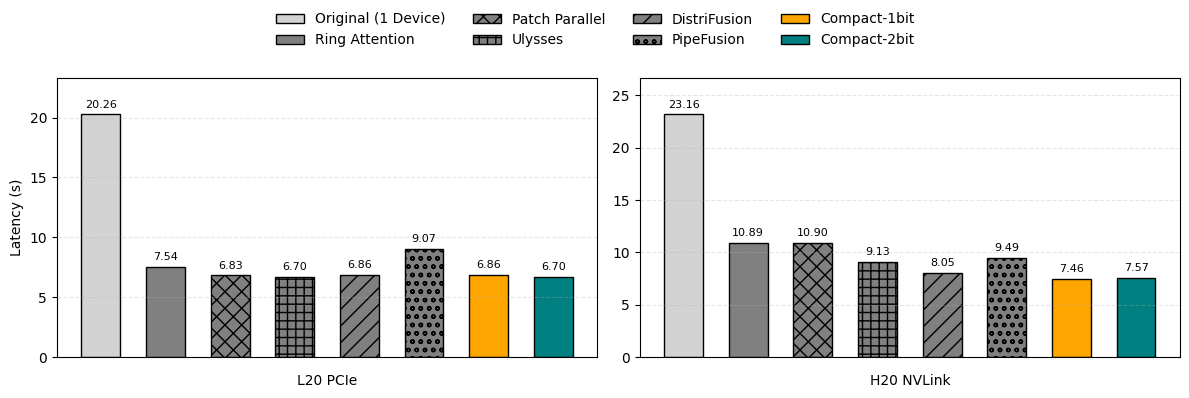

In [21]:
plot_latency_comparison(
    "latency_data/latency_pcie.csv", "latency_data/latency_nvlink.csv",
    "L20 PCIe", "H20 NVLink"
)